In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Question 1

### Exploring and preprocessing the data

In [2]:
bank_df = pd.read_csv('Data/bankPortfolios.csv', header=None, index_col=False)
bank_df.columns = ['loans_cons_land', 'loans_farm', 'loans_<4family', 'loans_multi_family', 'loans_nonfarm_nonres', 
              'agri_loans','loans_agri_comm','loans_individs', 'other_loans', 'obligations', 'htm_securities', 
              'afs_securities','fixed_assets', 'cash', 'debt', 'default']
bank_df

,loans_cons_land,loans_farm,loans_<4family,loans_multi_family,loans_nonfarm_nonres,agri_loans,loans_agri_comm,loans_individs,other_loans,obligations,htm_securities,afs_securities,fixed_assets,cash,debt,default
0,2699.0,6107.00,9965.0,1036.00,2924.0,3786.00,4573.0,1087.00,617.000,76.827,769.0,1828.2,381.0,933.0,32673.0,1
1,759920.0,6480.00,588660.0,528110.00,1188700.0,169400.00,174890.0,10210.00,6566.000,21101.000,211210.0,428740.0,82487.0,68882.0,3770300.0,1
2,129080.0,729.00,72972.0,3310.00,73909.0,34.00,44928.0,32995.00,409.000,502.000,15599.0,57902.0,20800.0,12168.0,423250.0,1
3,57828.0,1449.80,27634.0,1739.00,39274.0,1838.30,9854.0,1900.00,321.000,228.980,2291.9,7696.0,4609.0,7823.0,145830.0,1
4,1021.0,14222.00,3186.0,35.00,4776.0,29645.00,9295.0,3245.00,493.000,215.000,4932.0,20818.0,891.0,3661.0,87600.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778,1922.1,1047.80,3587.5,401.39,3242.4,1328.60,2094.4,1002.20,92.600,165.490,1656.5,7987.0,543.0,517.0,8514.0,0
7779,1424.2,776.41,2658.2,297.42,755.0,984.45,598.0,742.63,68.614,122.620,1227.4,1838.0,207.0,256.0,681.0,0
7780,5931.1,3233.30,11070.0,1238.60,10005.0,4099.70,6462.9,3092.60,285.740,510.660,5111.4,12152.0,593.0,1352.0,14020.0,0
7781,8914.9,1300.00,374.0,512.00,7300.0,6162.20,1840.0,75.00,429.490,767.560,7682.9,971.0,4750.0,361.0,21573.0,0


In [3]:
# count number of missing values per column, flag any 
print(f'Number of missing values per column:\n{bank_df.isnull().sum()}')

# check for any duplicate rows
print(f'\nNumber of duplicated rows: {bank_df.duplicated().sum()}')
print(f'Index of duplicated row: {bank_df[bank_df.duplicated()].index}')

# drop duplicate rows
bank_df = bank_df.drop_duplicates()
print(f'New data shape: {bank_df.shape}')

# check for any duplicate columns
print(f'Number of duplicated columns: {bank_df.T.duplicated().sum()}')

Number of missing values per column:
loans_cons_land         0
loans_farm              0
loans_<4family          0
loans_multi_family      0
loans_nonfarm_nonres    0
agri_loans              0
loans_agri_comm         0
loans_individs          0
other_loans             0
obligations             0
htm_securities          0
afs_securities          0
fixed_assets            0
cash                    0
debt                    0
default                 0
dtype: int64

Number of duplicated rows: 1
Index of duplicated row: Index([6996], dtype='int64')
New data shape: (7782, 16)
Number of duplicated columns: 0


In [4]:
# Checking for imbalance in the target variable
y = bank_df['default']
X = bank_df.drop('default', axis=1)

print(f'Balance of the data: {y.value_counts(normalize=True)}')

Balance of the data: default
0    0.960678
1    0.039322
Name: proportion, dtype: float64


Very imbalanced data since most banks (thankfully) don't default - This will need to be dealt with later in one of three ways:
1. **Balanced_weights**
2. Synthetic Minority Over-sampling (SMOTE)
3. Random undersampling of majority class

In [5]:
# Generating new features: Relative features
X['debt_liqassets'] = X['debt'] / (X.loc[:, 'cash'] + X.loc[:, 'afs_securities'])
X['total_loans'] = X.iloc[:, :9].sum(axis=1)
X['total_loans_vs_liq_assets'] = X['total_loans'] / (X.loc[:, 'afs_securities'] + X.loc[:, 'cash'])
X['total_loansandliabs_vs_assets'] = (X['total_loans'] + X['debt'] + X['obligations']) / (X.loc[:, 'afs_securities'] + X.loc[:, 'cash'] + X.loc[:, 'fixed_assets'] + X.loc[:, 'htm_securities'])
X['total_loans_vs_obligations'] = X['total_loans'] / X.loc[:, 'obligations']
X['total_loans_vs_debt'] = X['total_loans'] / X.loc[:, 'debt']
X['total_loans_vs_total_assets'] = X['total_loans'] / (X.loc[:, 'afs_securities'] + X.loc[:, 'cash'] + X.loc[:, 'fixed_assets'] + X.loc[:, 'htm_securities'])
X['net_debt'] = X['debt'] - (X.loc[:, 'afs_securities'] + X.loc[:, 'cash'])

# # toggles for the size of the bank, split into 3 categories, small, mid and large banks (too big to fail arguement)
# X['bank_size'] = pd.qcut(X['total_loans'], q=3, labels=['small', 'mid', 'large'])
# X = pd.get_dummies(X, columns=['bank_size'], prefix='bank_size', dtype=int)

In [6]:
X.describe()

,loans_cons_land,loans_farm,loans_<4family,loans_multi_family,loans_nonfarm_nonres,agri_loans,loans_agri_comm,loans_individs,other_loans,obligations,...,cash,debt,debt_liqassets,total_loans,total_loans_vs_liq_assets,total_loansandliabs_vs_assets,total_loans_vs_obligations,total_loans_vs_debt,total_loans_vs_total_assets,net_debt
count,7.782000e+03,7.782000e+03,7.782000e+03,7.782000e+03,7.782000e+03,7.782000e+03,7.782000e+03,7.782000e+03,7.782000e+03,7.782000e+03,...,7.782000e+03,7.782000e+03,7782.000000,7.782000e+03,7782.000000,7782.000000,7782.000000,7782.000000,7782.000000,7.782000e+03
mean,9.954604e+04,3.180913e+04,3.930413e+05,2.378630e+04,1.586130e+05,2.882351e+04,2.062885e+05,1.736739e+05,3.634004e+04,1.268113e+04,...,6.385676e+04,1.457745e+06,6.736899,1.151922e+06,5.981670,7.780255,inf,inf,3.640247,1.108391e+06
std,1.053948e+06,6.457662e+05,9.295623e+06,3.699858e+05,1.771342e+06,5.050949e+05,3.940249e+06,4.403477e+06,1.265136e+06,2.499901e+05,...,1.397342e+06,2.630305e+07,13.158104,2.052762e+07,14.260768,21.483881,NaN,NaN,11.344964,1.943309e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.876200e-01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,4.224034e+00,0.003068,0.053575,0.810924,0.003720,0.000513,-2.047330e+05
25%,1.451275e+03,8.609525e+02,6.526250e+03,3.900275e+02,4.840750e+03,7.830200e+02,3.922250e+03,1.548400e+03,4.000000e+01,1.496025e+02,...,2.087750e+03,5.207375e+04,2.909240,3.834172e+04,2.055068,3.752770,72.064260,0.680344,1.527065,3.645375e+04
50%,6.954000e+03,2.903500e+03,1.893700e+04,1.351200e+03,1.869200e+04,2.899000e+03,1.048950e+04,3.814000e+03,1.520000e+02,5.020000e+02,...,4.381500e+03,1.150200e+05,4.501567,8.908885e+04,3.632411,5.748257,168.390532,0.805067,2.551152,8.580000e+04
75%,2.994025e+04,8.127825e+03,5.038650e+04,4.924500e+03,5.693600e+04,8.647375e+03,2.875625e+04,9.271000e+03,6.677700e+02,1.688575e+03,...,9.653250e+03,2.713750e+05,7.304426,2.209352e+05,6.471421,8.847531,445.347564,0.906001,4.170804,2.138338e+05
max,4.484800e+07,3.951900e+07,4.917600e+08,2.075700e+07,7.565400e+07,3.100000e+07,2.360700e+08,2.803400e+08,9.599100e+07,1.602200e+07,...,8.618200e+07,1.212500e+09,903.475906,1.036036e+09,1005.529773,1782.152048,inf,inf,938.712212,9.586830e+08


In [7]:
# no NA values but inf values need to be replaced:
X.replace([np.inf, -np.inf], 0, inplace=True)

In [8]:
# split into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(default
 0    0.960643
 1    0.039357
 Name: proportion, dtype: float64,
 default
 0    0.960822
 1    0.039178
 Name: proportion, dtype: float64)

In [9]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df.head()

,loans_cons_land,loans_farm,loans_<4family,loans_multi_family,loans_nonfarm_nonres,agri_loans,loans_agri_comm,loans_individs,other_loans,obligations,...,cash,debt,debt_liqassets,total_loans,total_loans_vs_liq_assets,total_loansandliabs_vs_assets,total_loans_vs_obligations,total_loans_vs_debt,total_loans_vs_total_assets,net_debt
0,-0.078640,-0.056322,-0.042637,-0.061740,-0.084053,-0.054657,-0.052050,-0.040008,-0.029048,-0.047719,...,-0.043288,-0.053117,-0.248880,-0.054527,-0.240318,-0.149256,-0.086570,-0.016052,-0.150500,-0.055246
1,-0.078553,-0.047226,-0.039133,-0.055356,-0.063689,-0.042910,-0.046290,-0.040554,-0.028721,-0.045900,...,-0.041382,-0.048602,1.213113,-0.049579,0.871408,-0.038445,-0.081082,-0.014830,-0.046238,-0.048598
2,34.457553,3.937572,47.384334,31.551131,37.002955,4.332465,40.865373,17.233736,15.101970,60.034155,...,32.739232,41.143489,-0.252712,39.602859,-0.235308,-0.099772,-0.090889,-0.015580,-0.106978,38.240635
3,-0.091916,-0.057318,-0.041698,-0.061357,-0.078934,-0.049290,-0.050234,-0.036223,-0.028664,-0.049201,...,-0.041825,-0.050008,-0.346866,-0.053028,-0.328859,-0.217010,0.101853,-0.018617,-0.219837,-0.053989
4,-0.090992,-0.052589,-0.042432,-0.063432,-0.083293,-0.050230,-0.052137,-0.040095,-0.028899,-0.048976,...,-0.043413,-0.053474,-0.195803,-0.054851,-0.204890,-0.133779,-0.060957,-0.016032,-0.137684,-0.055434


<Axes: >

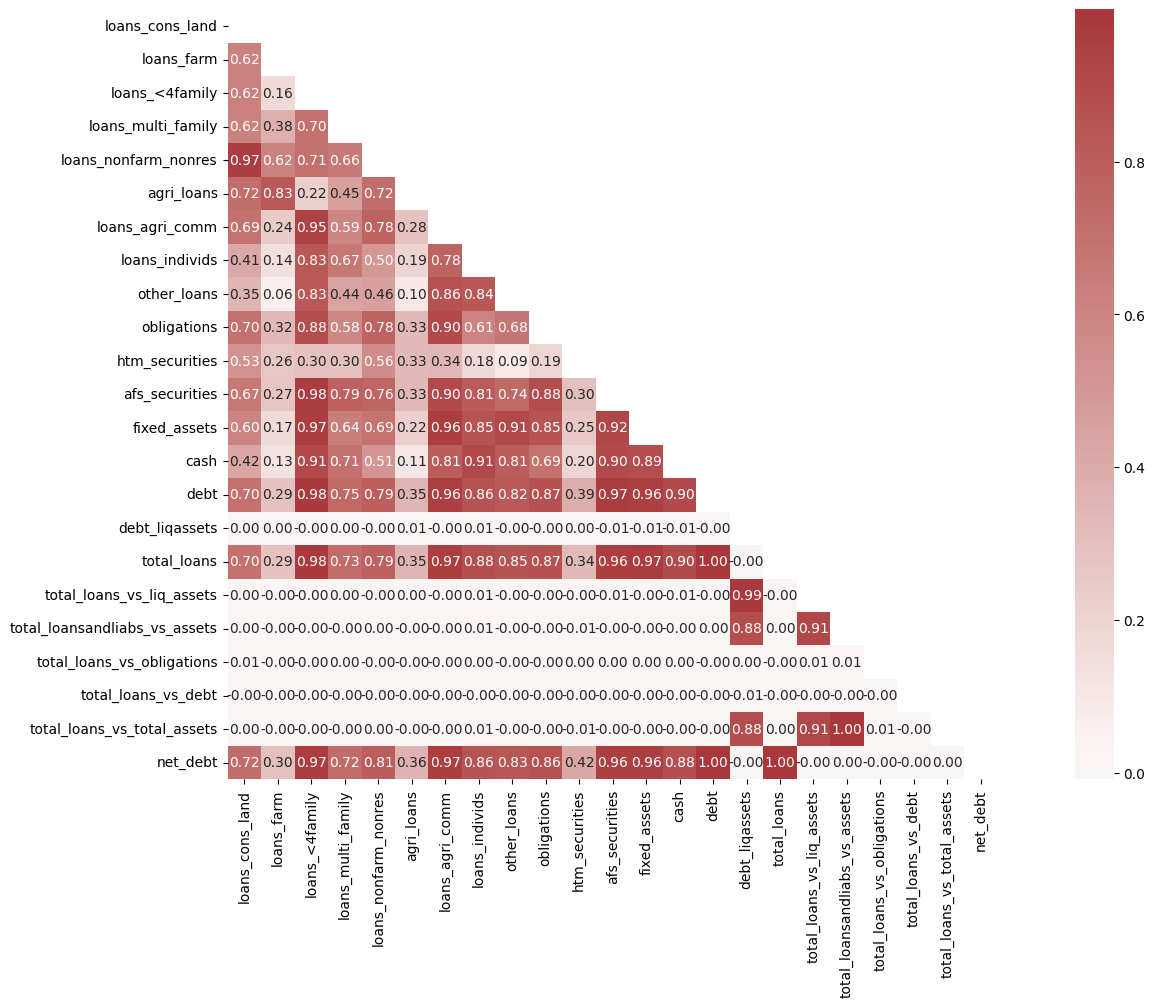

In [10]:
corr_matrix = X_train_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap='vlag')

We can see the data is highly correlated, so this needed to be adjsuted to make more stable predictions. Its good to see the correlation of my new features is low

### Applying PCA

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data.index = X_train_df.columns 
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(len(X_train_df.columns))] 
vif_data

,VIF
loans_cons_land,inf
loans_farm,inf
loans_<4family,inf
loans_multi_family,inf
loans_nonfarm_nonres,inf
agri_loans,inf
loans_agri_comm,inf
loans_individs,inf
other_loans,inf
obligations,20.810738


- Very high collinearity between variables. This makes sense given the similarity between all the different types of loans included as features
- Given this, it seems around 5-9 features seems reasonable (only 9 features have VIF values < inf)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_PCA(df, n_components):

    pca = PCA(n_components=n_components, random_state=42)
    pca_fit = pca.fit(df)
    PC_df = pca.transform(df)
    explained_variance = pca.explained_variance_ratio_
    PC_df = pd.DataFrame(data=PC_df, columns=[f'component_{i+1}' for i in range(PC_df.shape[1])])
    return pca_fit, PC_df, explained_variance

# perform PCA on the training data
pca_fits = {}
pca_dfs = {}
explained_vars = []
for i in [4,6,8]:
    pc_fit, PC_df, explained_variance = perform_PCA(X_train_df, n_components=i)
    
    pca_fits[f'PCs_{i}_fit'] = pc_fit
    pca_dfs[f'PCs_{i}_df'] = PC_df
    explained_vars.append(explained_variance.sum())

In [13]:
vif_data = pd.DataFrame() 
vif_data.index = pca_dfs['PCs_8_df'].columns 
vif_data["VIF"] = [variance_inflation_factor(pca_dfs['PCs_8_df'].values, i) for i in range(len(pca_dfs['PCs_8_df'].columns))] 
vif_data

,VIF
component_1,1.0
component_2,1.0
component_3,1.0
component_4,1.0
component_5,1.0
component_6,1.0
component_7,1.0
component_8,1.0


In [14]:
print(f'Explained variance:\n4 PCs: {explained_vars[0]}\n6 PCs: {explained_vars[1]}\n8 PCs: {explained_vars[2]}')
# explained_variance = pca_fits['PCs_8_fit'].explained_variance_ratio_

Explained variance:
4 PCs: 0.8347957973848082
6 PCs: 0.9163596768741695
8 PCs: 0.9657743302833373


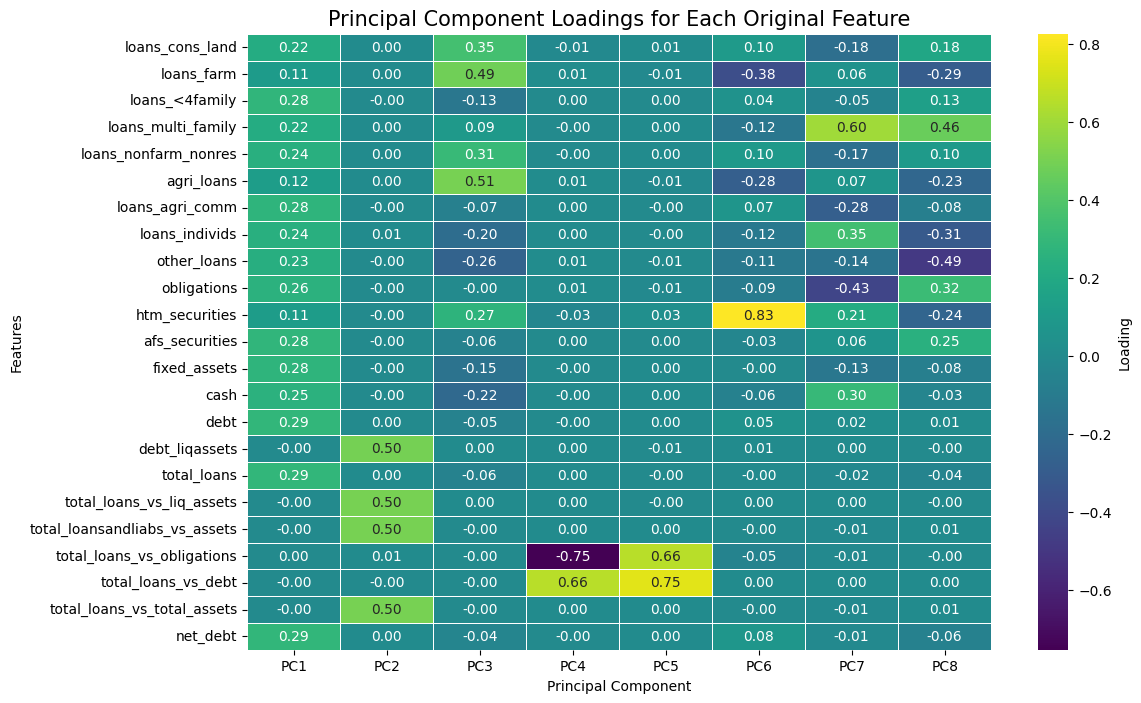

In [15]:
# Get the loadings
loadings = pd.DataFrame(pca_fits['PCs_8_fit'].components_.T, columns=[f'PC{i+1}' for i in range(8)], index=X.columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, cmap='viridis', annot=True, fmt=".2f", linewidths=.5, cbar_kws={"label": "Loading"})
plt.title('Principal Component Loadings for Each Original Feature', fontsize=15)
plt.xlabel('Principal Component')
plt.ylabel('Features')
plt.show()

## Training Model 1: Logistic Regression (base model)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline

results = {key: [] for key in pca_dfs.keys()}
for df in pca_dfs.keys():

    # Building the model architechture
    logreg_pipeline = Pipeline(steps=[('logreg', LogisticRegression(random_state=42, max_iter=10000, class_weight='balanced',
                                                                    solver='liblinear', tol=1e-4, penalty='l2'))]) 
    param_grid = [{'logreg__C': [1e-5, 1e-4, 1e-3, 0.01, 0.1]}]
    
    # Cross validating on the hyperparameter space
    logreg_grid_search = GridSearchCV(logreg_pipeline, param_grid, cv=5, scoring='balanced_accuracy', return_train_score=False) # or accuracy
    logreg_grid_search.fit(pca_dfs[df], y_train)

    results[df] = [logreg_grid_search.best_score_, logreg_grid_search.best_index_, logreg_grid_search.best_params_]

In [17]:
results

{'PCs_4_df': [0.658711009487407, 1, {'logreg__C': 0.0001}],
 'PCs_6_df': [0.6627619275134804, 0, {'logreg__C': 1e-05}],
 'PCs_8_df': [0.6643010715992083, 0, {'logreg__C': 1e-05}]}

A lower value of C will indicate the model to give complexity more weight at the cost of fitting the data

In [18]:
X_train, X_val, y_train, y_val = train_test_split(pca_dfs['PCs_8_df'], y_train, test_size=0.1, shuffle=True, stratify=y_train, random_state=42)
logreg_clf = LogisticRegression(C=1e-5, random_state=42, max_iter=10000, class_weight='balanced', 
                                solver='liblinear', tol=1e-4, penalty='l2').fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

cross_val_score(logreg_clf, X_val, y_val, cv=5)

array([0.68      , 0.704     , 0.744     , 0.7016129 , 0.61290323])

Val set and train set have similar results suggesting there is no overfitting and the model performs well out of sample.

In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, RocCurveDisplay, precision_score, mean_squared_error, recall_score

X_test = scaler.transform(X_test)
X_test = pca_fits['PCs_8_fit'].transform(X_test)

logreg_predictions = logreg_clf.predict(X_test)

### Performance Evaluation

Logistic Regression Mean Absolute Error: 0.28
Accuracy: 0.7186897880539499
Precision: 0.09808102345415778
Recall: 0.7540983606557377
Specificity: 0.7172459893048129


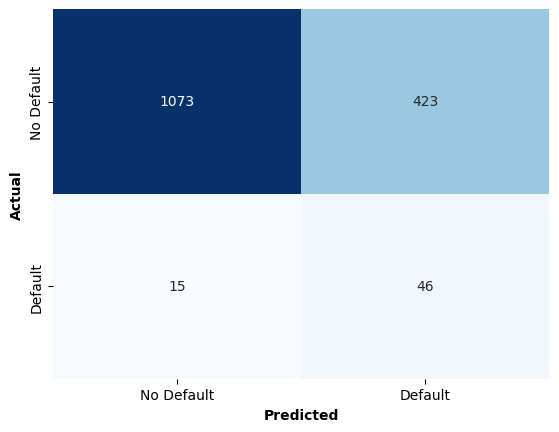

In [20]:
logreg_errors = abs(logreg_predictions - y_test)
print('Logistic Regression Mean Absolute Error:', round(np.mean(logreg_errors), 2))
print(f'Accuracy: {accuracy_score(y_test, logreg_predictions)}')
print(f'Precision: {precision_score(y_test, logreg_predictions)}')
print(f'Recall: {recall_score(y_test, logreg_predictions)}')

clf_thres = 0.1
logreg_conf_mat = confusion_matrix(y_test, np.heaviside(logreg_predictions-clf_thres,0) )
tn, fp, fn, tp = confusion_matrix(y_test, logreg_predictions).ravel()
specificity = tn / (tn+fp)
print(f'Specificity: {specificity}')

sns.heatmap(logreg_conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
# plt.title('Confusion Matrix', fontsize=12, fontweight='bold')
plt.show()

0.7756750241080038


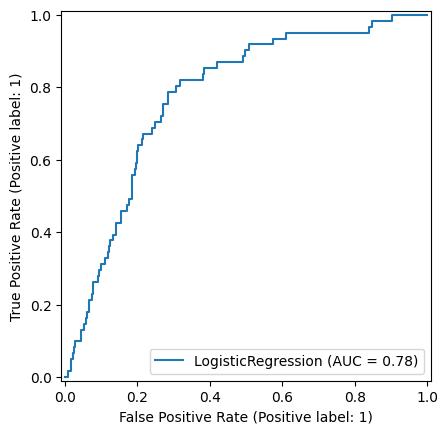

In [22]:
print(roc_auc_score(y_test, logreg_clf.predict_proba(X_test)[:,1]))
RocCurveDisplay.from_estimator(logreg_clf, X_test, y_test) 

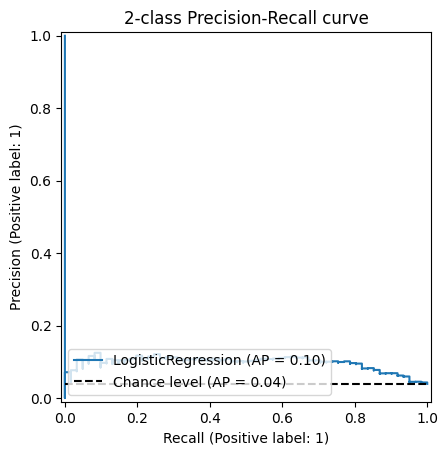

In [23]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    logreg_clf, X_test, y_test, name="LogisticRegression", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Going forward I will use PCA with 8 principal conponents for other models for a fair comparison, alongside the same X_val and X_test sets

## Model 2: Linear Support Vector Machine
- C: lower value means more misclassifications (soft-margin, more margin violations), so less overfitting

In [24]:
# Using the 8 PC dataframe, checking structure again:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5602, 8), (5602,), (623, 8), (623,), (1557, 8), (1557,))

In [25]:
from sklearn.svm import SVC, LinearSVC

# Linear Support Vector Classifier
linSVC_pipeline = Pipeline(steps=[('linear_svc', LinearSVC(penalty='l2',  loss='squared_hinge', dual=False, random_state=42, 
                                                           class_weight='balanced',  tol=1e-4, max_iter=10000))])
param_grid = [{'linear_svc__C': [1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(linSVC_pipeline, param_grid, cv=5, scoring='balanced_accuracy', return_train_score=False) # or accuracy
grid_search.fit(X_train, y_train)

linSVC_results = [grid_search.best_score_, grid_search.best_index_, grid_search.best_params_]
linSVC_results

[0.7155582264328679, 5, {'linear_svc__C': 1}]

- linearSVC: Dual = false. Luckily the SVM problem happens to meet the conditions that its objective function is convex, the inequality constraints are continuously differnetiable and convex functions, so we can choose the primal or dual problem and both will have the same solution.
- L2 chosen as I have alreday done PCA and also not comparable to rest of models if I use L1 and do more feature selection

In [26]:
linSVC_clf = LinearSVC(penalty='l2', C=1, loss='squared_hinge', dual=False, 
                       random_state=42, class_weight='balanced',  tol=1e-4, max_iter=10000).fit(X_train, y_train)

cross_val_score(linSVC_clf, X_val, y_val, cv=5)

array([0.832     , 0.784     , 0.84      , 0.82258065, 0.73387097])

Linear SVC Mean Absolute Error: 0.11
Accuracy: 0.8876043673731535
Precision: 0.1797752808988764
Recall: 0.5245901639344263
Specificity: 0.9024064171122995


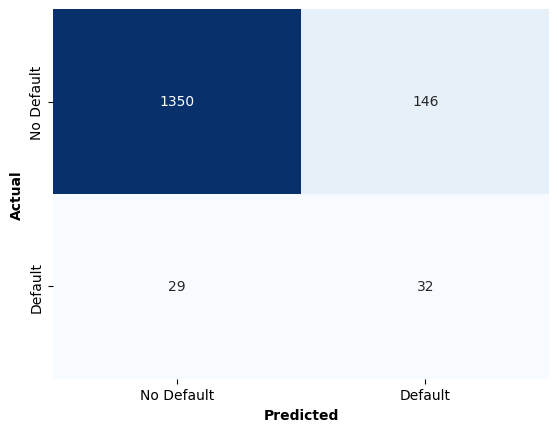

In [27]:
# no need to transform and scale (PCA) X_Test as it was already done for the logistic regression
linSVC_predictions = linSVC_clf.predict(X_test)

linSVC_errors = abs(linSVC_predictions - y_test)
print('Linear SVC Mean Absolute Error:', round(np.mean(linSVC_errors), 2))
print(f'Accuracy: {accuracy_score(y_test, linSVC_predictions)}')
print(f'Precision: {precision_score(y_test, linSVC_predictions)}')
print(f'Recall: {recall_score(y_test, linSVC_predictions)}')
tn, fp, fn, tp = confusion_matrix(y_test, linSVC_predictions).ravel()
specificity = tn / (tn+fp)
print(f'Specificity: {specificity}')

clf_thres = 0.1
linsvc_conf_mat = confusion_matrix(y_test, np.heaviside(linSVC_predictions-clf_thres,0) )

sns.heatmap(linsvc_conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
# plt.title('Confusion Matrix')
plt.show()

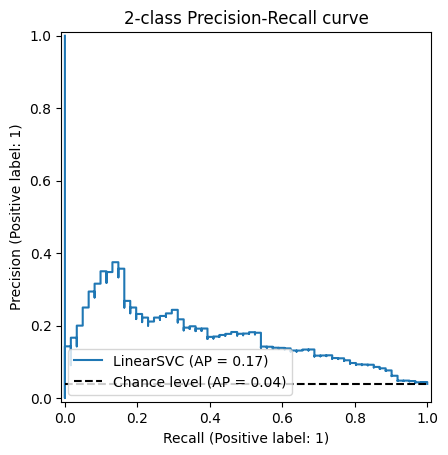

In [28]:
display = PrecisionRecallDisplay.from_estimator(
        linSVC_clf, X_test, y_test, name="LinearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Superior precision and accuracy scores vs base model bubt that was due to bias for 0 classificaiton. Understandably worse as likley to have non-linear relationship. After all, if it linear relationship, we could easily predict defaults!

## Model 3: Kernel Support Vector Machine
To tackle nonlinearity can use similarity functions. The kernal trick makes it possible to obtain similar results to simliarity functions (raising all data into higher dimensions), without actually doing so. This reduces computation time significantly.  
- Gamma parameter: small values make the bell-shaped curve wider meaning each data point has a larger influence (like KNN) and the decision boundary ends up being smoother, leading to less overfitting. gamma = 0.3 leads to gaussian kernel. 
- coef has little impact for kernel models

A simple rule of thumb to start with linear then guassian then others. I've completed linear above and now will try guassian and move to further methods if this doesn't perform better

In [29]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5602, 8), (5602,), (623, 8), (623,), (1557, 8), (1557,))

In [25]:
from sklearn.svm import SVC

# Support Vector Classifier - used balanced accuracy scoring due to the imbalance in the data
gausSVC_pipeline = Pipeline(steps=[('svc', SVC(probability=True, random_state=42, class_weight='balanced', 
                                           kernel='rbf', gamma = 0.3, tol=1e-4, max_iter=10000))])
param_grid = [{'svc__C': [1e-3, 0.01, 0.1, 1, 2, 5, 10, 100], 'svc__degree': [2, 3, 4, 5]}]

grid_search = GridSearchCV(gausSVC_pipeline, param_grid, cv=5, scoring='balanced_accuracy', return_train_score=False)
grid_search.fit(X_train, y_train)

gauslinsvc_results = [grid_search.best_score_, grid_search.best_index_, grid_search.best_params_]
gauslinsvc_results

In [31]:
gausSVC_clf = SVC(probability=True, C=100, gamma=0.3, degree = 2, class_weight='balanced', 
              kernel='rbf', tol=1e-4, max_iter=10000, random_state=42).fit(X_train, y_train)

cross_val_score(gausSVC_clf, X_val, y_val, cv=5)

array([0.712     , 0.728     , 0.736     , 0.74193548, 0.62903226])

### Performance Evaluation

Guassian SVC Mean Absolute Error: 0.22
Accuracy: 0.7822736030828517
Precision: 0.10955056179775281
Recall: 0.639344262295082
Specificity: 0.7881016042780749


Text(50.72222222222221, 0.5, 'Actual')

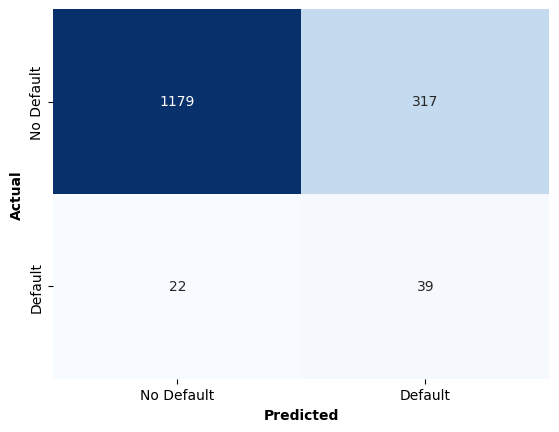

In [32]:
gausSVC_predictions = gausSVC_clf.predict(X_test)

gausSVC_errors = abs(gausSVC_predictions - y_test)
print('Guassian SVC Mean Absolute Error:', round(np.mean(gausSVC_errors), 2))
print(f'Accuracy: {accuracy_score(y_test, gausSVC_predictions)}')
print(f'Precision: {precision_score(y_test, gausSVC_predictions)}')
print(f'Recall: {recall_score(y_test, gausSVC_predictions)}')
tn, fp, fn, tp = confusion_matrix(y_test, gausSVC_predictions).ravel()
specificity = tn / (tn+fp)
print(f'Specificity: {specificity}')

clf_thres = 0.1
gausSVC_conf_mat = confusion_matrix(y_test, np.heaviside(gausSVC_predictions-clf_thres,0) )

sns.heatmap(gausSVC_conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
# plt.title('Confusion Matrix', fontsize=12, fontweight='bold')

0.7692425703515386


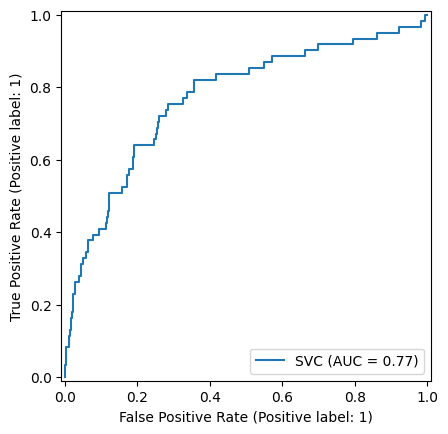

In [33]:
print(roc_auc_score(y_test, gausSVC_clf.predict_proba(X_test)[:,1]))
RocCurveDisplay.from_estimator(gausSVC_clf, X_test, y_test) 

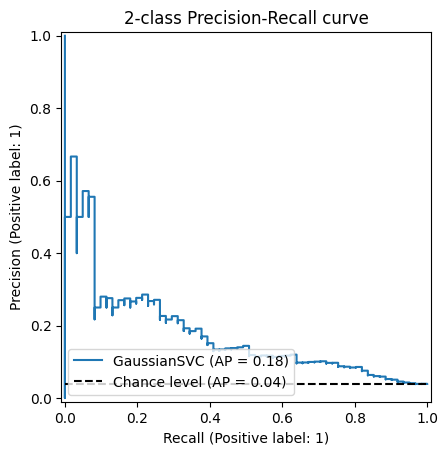

In [34]:
display = PrecisionRecallDisplay.from_estimator(
    gausSVC_clf, X_test, y_test, name="GaussianSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Improvement on the linear model and overall vs logistic but still the logistic model is superior for default classifications.

### Using the RBF kernel

In [31]:
# using RBF kernel to fit for higher dimensions
SVC_pipeline = Pipeline(steps=[('svc', SVC(probability=True, random_state=42, class_weight='balanced', 
                                           kernel='rbf', degree= 3,tol=1e-4, max_iter=10000))])
param_grid = [{'svc__C': [1e-3, 0.01, 0.1, 1, 2, 5, 10], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10]}]

grid_search = GridSearchCV(SVC_pipeline, param_grid, cv=5, scoring='balanced_accuracy', return_train_score=False) 
grid_search.fit(X_train, y_train)

svc_results = [grid_search.best_score_, grid_search.best_index_, grid_search.best_params_]
svc_results

[0.7026446941377407, 32, {'svc__C': 10, 'svc__gamma': 0.1}]

No improvement in the model was found going from 3->4->5 degrees, so used 3

In [35]:
SVC_clf = SVC(probability=True, C=10, gamma=0.1, degree = 3, class_weight='balanced', 
              kernel='rbf', tol=1e-4, max_iter=10000, random_state=42,).fit(X_train, y_train) # DEGREE WAS 4

cross_val_score(SVC_clf, X_val, y_val, cv=5)

array([0.736     , 0.72      , 0.656     , 0.72580645, 0.62096774])

### Performance Evaluation

RBF SVC Mean Absolute Error: 0.24
Accuracy: 0.7572254335260116
Precision: 0.10669975186104218
Recall: 0.7049180327868853
Specificity: 0.7593582887700535


Text(50.72222222222221, 0.5, 'Actual')

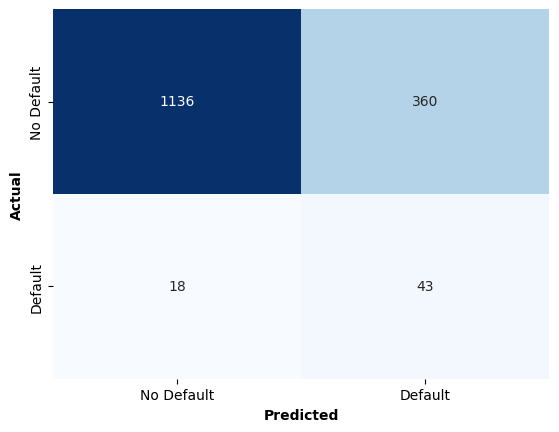

In [36]:
SVC_predictions = SVC_clf.predict(X_test)

SVC_errors = abs(SVC_predictions - y_test)
print('RBF SVC Mean Absolute Error:', round(np.mean(SVC_errors), 2))
print(f'Accuracy: {accuracy_score(y_test, SVC_predictions)}')
print(f'Precision: {precision_score(y_test, SVC_predictions)}')
print(f'Recall: {recall_score(y_test, SVC_predictions)}')
tn, fp, fn, tp = confusion_matrix(y_test, SVC_predictions).ravel()
specificity = tn / (tn+fp)
print(f'Specificity: {specificity}')

clf_thres = 0.1
svc_conf_mat = confusion_matrix(y_test, np.heaviside(SVC_predictions-clf_thres,0) )

sns.heatmap(svc_conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
# plt.title('Confusion Matrix', fontsize=12, fontweight='bold')

0.7934053651266766


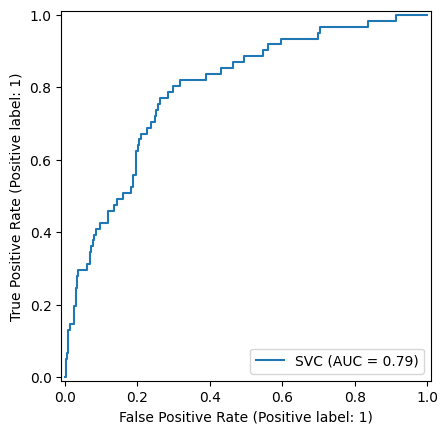

In [37]:
print(roc_auc_score(y_test, SVC_clf.predict_proba(X_test)[:,1]))
RocCurveDisplay.from_estimator(SVC_clf, X_test, y_test) 

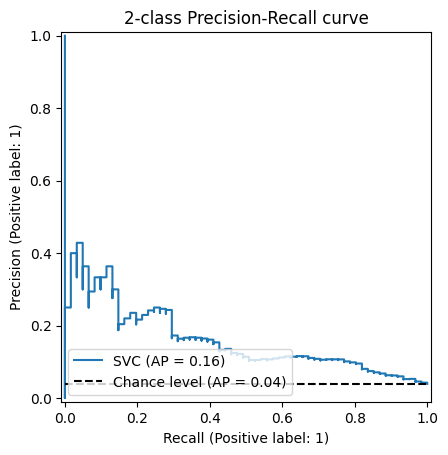

In [38]:
display = PrecisionRecallDisplay.from_estimator(
    SVC_clf, X_test, y_test, name="SVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Finally, I will try an SGD classifier, which may find a better solution than logistic as we can perform early stopping. I perform iterations (epochs) until the validation error has been above the minimum for some time (ensuring the gradient descent doesn't find a straddle point/local minima), then roll back the model parameters to the point where the parameters were at the validation error. I am therefore more likely to find the global minimum parameters in terms of the bias variance trade-off

## Using SGD Classifier

In [39]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5602, 8), (5602,), (623, 8), (623,), (1557, 8), (1557,))

In [41]:
from sklearn.linear_model import SGDClassifier

SGD_pipeline = Pipeline(steps=[('sgd', SGDClassifier(loss='log_loss', penalty='l2', tol=1e-4, class_weight='balanced', 
                                                     max_iter=10000, random_state=42))]) # perceptron
param_grid = [{'sgd__alpha': [1e-5, 1e-4, 1e-3, 0.01, 0.1, 1, 10]}]

grid_search = GridSearchCV(SGD_pipeline, param_grid, cv=5, scoring='balanced_accuracy', 
                           return_train_score=False).fit(X_train, y_train)

sgd_results = [grid_search.best_score_, grid_search.best_index_, grid_search.best_params_]
sgd_results

In [42]:
sgd_clf = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, tol=1e-4, 
                        class_weight='balanced', max_iter=10000, random_state=42).fit(X_train, y_train)

cross_val_score(sgd_clf, X_val, y_val, cv=5)

array([0.608     , 0.904     , 0.84      , 0.71774194, 0.66935484])

In [43]:
from copy import deepcopy
# P163
n_epochs = 500
best_valid_rmse = np.inf
best_model = None
for epoch in range(n_epochs):
    # train the model
    sgd_clf.fit(X_train, y_train)
    y_val_predict = sgd_clf.predict(X_val)

    # evaluate the model    
    val_error = mean_squared_error(y_val, y_val_predict, squared=True)
    
    # check for improvement
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_clf)

SGD SVC Mean Absolute Error: 0.2
Accuracy: 0.798330122029544
Precision: 0.12012012012012012
Recall: 0.6557377049180327
Specificity: 0.804144385026738


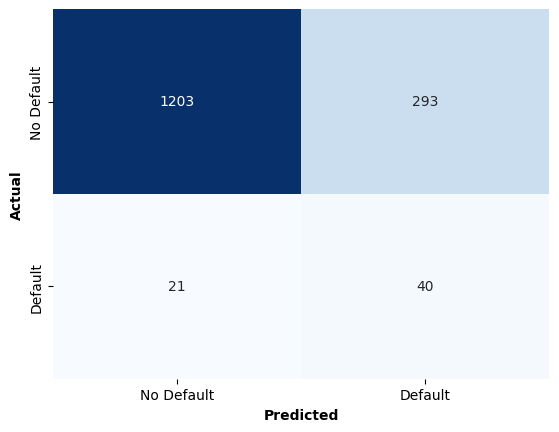

In [44]:
sgd_predictions = best_model.predict(X_test)

sgd_errors = abs(sgd_predictions - y_test)
print('SGD SVC Mean Absolute Error:', round(np.mean(sgd_errors), 2))
print(f'Accuracy: {accuracy_score(y_test, sgd_predictions)}')
print(f'Precision: {precision_score(y_test, sgd_predictions)}')
print(f'Recall: {recall_score(y_test, sgd_predictions)}')
tn, fp, fn, tp = confusion_matrix(y_test, sgd_predictions).ravel()
specificity = tn / (tn+fp)
print(f'Specificity: {specificity}')

clf_thres = 0.1
linsvc_conf_mat = confusion_matrix(y_test, np.heaviside(sgd_predictions-clf_thres,0) )

sns.heatmap(linsvc_conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
# plt.title('Confusion Matrix', fontsize=12, fontweight='bold')
plt.show()

0.8131739282896467


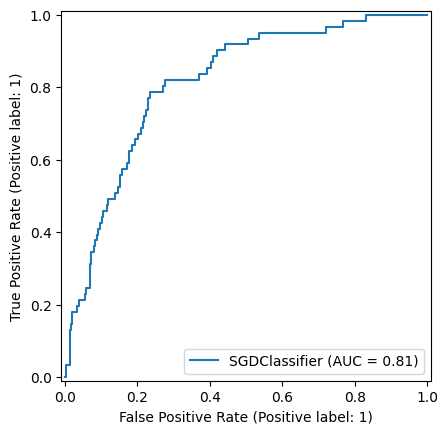

In [46]:
print(roc_auc_score(y_test, sgd_clf.predict_proba(X_test)[:,1]))
RocCurveDisplay.from_estimator(sgd_clf, X_test, y_test) 

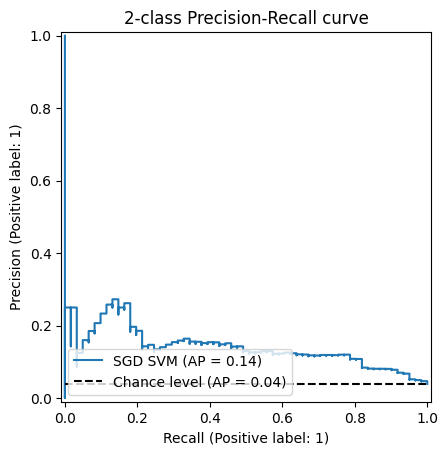

In [47]:
display = PrecisionRecallDisplay.from_estimator(
    sgd_clf, X_test, y_test, name="SGD SVM", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

AUC looks better but it is actually poorer at predicting defaults

## Model 4: Random Forest Classifier
Main issue with decision trees are that they ahve high variance - small cahnges in hyperparameters or data leads to very different models. Therefore, averaging the prediction over many trees leads to more stable predicitions. This can happen through an emsemble of deciison trees, i.e. a random forest. I am skipping DTs and going straight to RFs for my prediction. 

**Key Parameters:**
- Max leaf nodes: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes
- N estimators: number of trees in the forest
- Max depth: maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

In [46]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5602, 8), (5602,), (623, 8), (623,), (1557, 8), (1557,))

gini
[0.7275663093538025,
 1,
 {'randomforest__max_depth': 5, 'randomforest__n_estimators': 10}]

 entropy:
 [0.7141492772000377,
 0,
 {'randomforest__max_depth': 5, 'randomforest__n_estimators': 5}]
 
 log_loss:
 [0.7141492772000377,
 0,
 {'randomforest__max_depth': 5, 'randomforest__n_estimators': 5}]

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(steps=[('randomforest', RandomForestClassifier(criterion='gini', random_state = 42, class_weight='balanced', bootstrap=True, 
                                                                      min_samples_split=2, min_samples_leaf=1, max_features=8))]) #, max_samples=None, bootstrap=False
param_grid = [{'randomforest__n_estimators': [5, 10, 20, 40], 
               'randomforest__max_depth': [5, 10, 15, 20, 25, 30]}]

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='balanced_accuracy', return_train_score=False).fit(X_train, y_train)

rf_results = [grid_search.best_score_, grid_search.best_index_, grid_search.best_params_]
rf_results

small number of features (8) so makes sense that a relatively small number of trees are effective (10)

In [50]:
# Random Forest
rf_clf = RandomForestClassifier(criterion='gini', random_state = 42, class_weight='balanced', n_estimators=10, max_depth=5,
                                bootstrap=True, min_samples_split=2, min_samples_leaf=1, max_features=8).fit(X_train, y_train)

for score, name in zip(rf_clf.feature_importances_, X_train.columns):
    print(f'{name}: {round(score, 2)}')

component_1: 0.04
component_2: 0.21
component_3: 0.1
component_4: 0.04
component_5: 0.06
component_6: 0.04
component_7: 0.08
component_8: 0.43


Second feature is the ratio features I created and the 8th is the original features so it makes sense most importance is assigned to those two

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493:

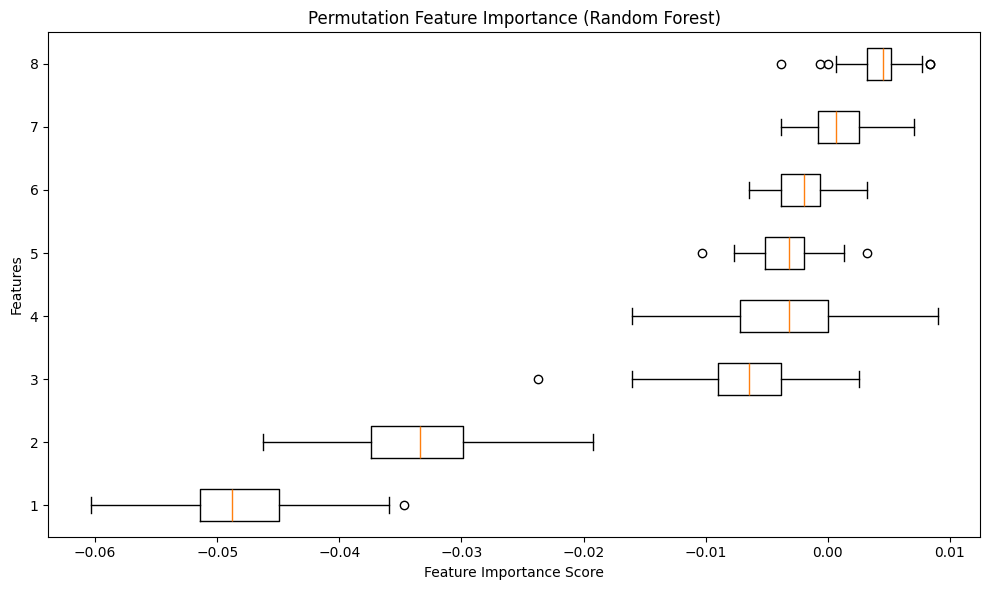

In [51]:
from sklearn.inspection import permutation_importance

# Compute the permutation feature importance
result = permutation_importance(rf_clf, X_test, y_test, n_repeats=100, random_state=42, n_jobs=-1)

# Sort the features by importance
sorted_idx = result.importances_mean.argsort()

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False)
plt.title("Permutation Feature Importance (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.tight_layout()

Text(23, 0.9627488760436738, 'Depth=23')

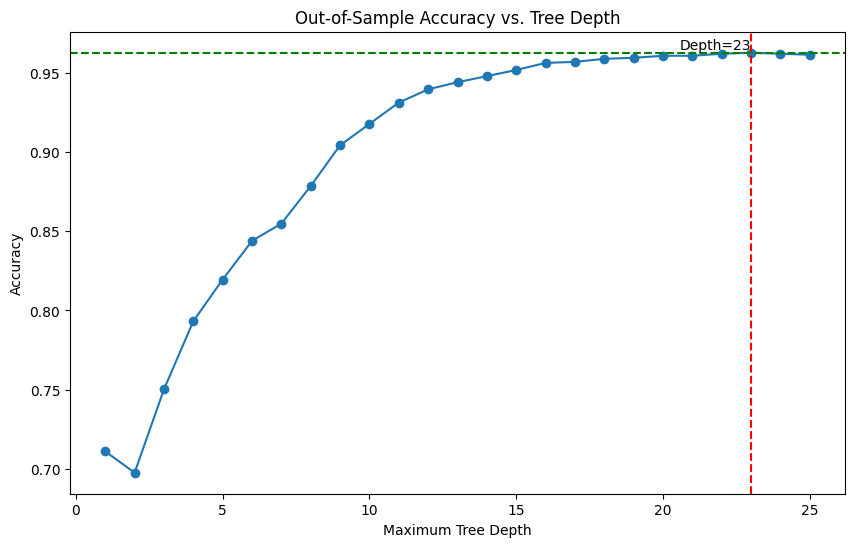

In [52]:
accuracy_scores = {}
for depth in range(1, 26):
    # Initialize the decision tree classifier with the current depth
    tree_clf = RandomForestClassifier(criterion='gini', random_state = 42, class_weight='balanced', n_estimators=10, max_depth=depth,
                                bootstrap=True, min_samples_split=2, min_samples_leaf=1, max_features=8).fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = tree_clf.predict(X_test)
    
    # Calculate the accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[depth] = accuracy

# Plotting the accuracy scores
optimal_depth = max(accuracy_scores, key=accuracy_scores.get)
optimal_accuracy = accuracy_scores[optimal_depth]

plt.figure(figsize=(10, 6))
plt.plot(accuracy_scores.keys(), accuracy_scores.values(), marker='o')
plt.title('Out-of-Sample Accuracy vs. Tree Depth')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.axvline(x=optimal_depth, color='r', linestyle='--')
plt.axhline(y=optimal_accuracy, color='g', linestyle='--')
plt.text(optimal_depth, optimal_accuracy, f"Depth={optimal_depth}", va='bottom', ha='right')

should experience significant decrease in information gain when dropping samples from any one feature due to PCA, therefore all should be important.

In [54]:
cross_val_score(rf_clf, X_val, y_val, cv=5)

array([0.88      , 0.88      , 0.896     , 0.80645161, 0.82258065])

Random Forest Mean Absolute Error: 0.18
Accuracy: 0.8195247270391779
Precision: 0.1206896551724138
Recall: 0.5737704918032787
Specificity: 0.8295454545454546


Text(50.72222222222221, 0.5, 'Actual')

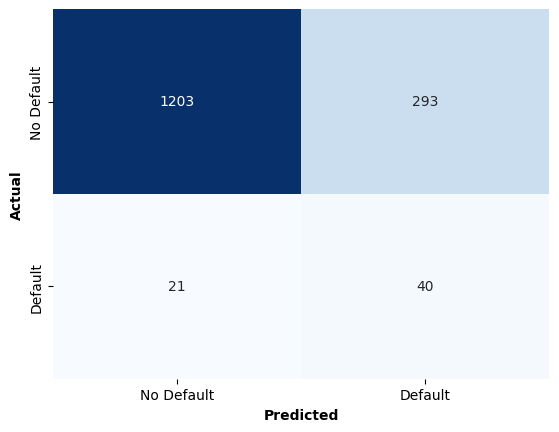

In [55]:
rf_predictions = rf_clf.predict(X_test)

rf_errors = abs(rf_predictions - y_test)
print('Random Forest Mean Absolute Error:', round(np.mean(rf_errors), 2))
print(f'Accuracy: {accuracy_score(y_test, rf_predictions)}')
print(f'Precision: {precision_score(y_test, rf_predictions)}')
print(f'Recall: {recall_score(y_test, rf_predictions)}')
tn, fp, fn, tp = confusion_matrix(y_test, rf_predictions).ravel()
specificity = tn / (tn+fp)
print(f'Specificity: {specificity}')

clf_thres = 0.1
mlp_conf_mat = confusion_matrix(y_test, np.heaviside(rf_predictions-clf_thres,0) )

sns.heatmap(linsvc_conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
# plt.title('Confusion Matrix', fontsize=12, fontweight='bold')

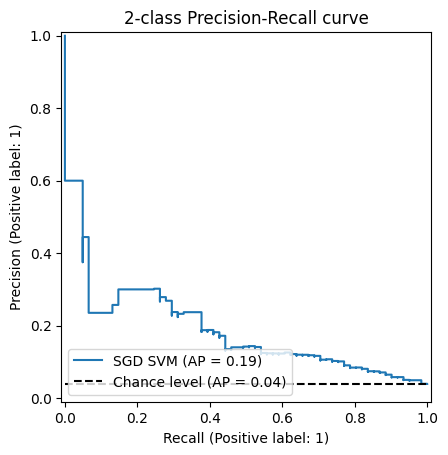

In [56]:
display = PrecisionRecallDisplay.from_estimator(
    rf_clf, X_test, y_test, name="SGD SVM", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

Surprising result. RF is often hard to beat, especially out of sample. Performs very well in correctly classifying non-defaults, but very poorly with defaults

## Final: Voting Classifier

In [40]:
sgd_clf =  best_model.fit(X_train, y_train)
# SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, tol=1e-4, 
#                         class_weight='balanced', max_iter=10000, random_state=42).fit(X_train, y_train)
SVC_clf = SVC(probability=True, C=10, gamma=0.1, degree = 3, class_weight='balanced', 
              kernel='rbf', tol=1e-4, max_iter=10000, random_state=42,).fit(X_train, y_train) # DEGREE = 4
guasSVC_clf = SVC(probability=True, C=10, gamma=0.3, degree = 2, class_weight='balanced', 
              kernel='rbf', tol=1e-4, max_iter=10000, random_state=42).fit(X_train, y_train)
linSVC_clf = LinearSVC(penalty='l2', C=1, loss='squared_hinge', dual=False, 
                       random_state=42, class_weight='balanced',  tol=1e-4, max_iter=10000).fit(X_train, y_train)
logreg_clf = LogisticRegression(C=1e-5, random_state=42, max_iter=10000, class_weight='balanced', 
                                solver='liblinear', tol=1e-4, penalty='l2').fit(X_train, y_train)
rf_clf = RandomForestClassifier(criterion='gini', random_state = 42, class_weight='balanced', n_estimators=10, max_depth=5,
                                bootstrap=True, min_samples_split=2, min_samples_leaf=1, max_features=8).fit(X_train, y_train)

In [41]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('sgd', sgd_clf), ('SVC', SVC_clf), ('gauslinSVC', guasSVC_clf), 
                                          ('logreg', logreg_clf), ('randomforest', rf_clf)], voting='hard').fit(X_train, y_train)

for name, clf in voting_clf.named_estimators_.items():
    print(name,' = ', clf.score(X_val, y_val))

sgd  =  0.7656500802568218
SVC  =  0.7287319422150883
gauslinSVC  =  0.7383627608346709
logreg  =  0.6902086677367576
randomforest  =  0.8073836276083467


In [42]:
cross_val_score(voting_clf, X_val, y_val, cv=5)

array([0.728     , 0.752     , 0.744     , 0.71774194, 0.63709677])

Voting Classifier Mean Absolute Error: 0.23
Accuracy: 0.7694283879254977
Precision: 0.1099476439790576
Recall: 0.6885245901639344
Specificity: 0.7727272727272727


Text(50.72222222222221, 0.5, 'Actual')

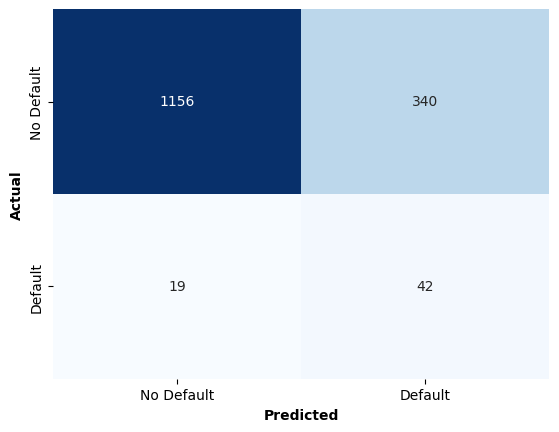

In [43]:
voting_clf_preds = voting_clf.predict(X_test)

vote_errors = abs(voting_clf_preds - y_test)
print('Voting Classifier Mean Absolute Error:', round(np.mean(vote_errors), 2))
print(f'Accuracy: {accuracy_score(y_test, voting_clf_preds)}')
print(f'Precision: {precision_score(y_test, voting_clf_preds)}')
print(f'Recall: {recall_score(y_test, voting_clf_preds)}')
tn, fp, fn, tp = confusion_matrix(y_test, voting_clf_preds).ravel()
specificity = tn / (tn+fp)
print(f'Specificity: {specificity}')

clf_thres = 0.1
vote_conf_mat = confusion_matrix(y_test, np.heaviside(voting_clf_preds-clf_thres,0) )

sns.heatmap(vote_conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
# plt.title('Confusion Matrix', fontsize=12, fontweight='bold')

Overall, voting classifier performs excellently in finding non-defaults, but very poorly at the task at hand i.e. finding companies that WILL default

All of the above method may be poorer predictions for this relatively small sample, but I believe they will generalise better than choosing a small number of components that would predict this particular crisis well but perform poorly in a true out of sample test, for example predicting the SVB collapse of 2022! This is a Meta overfitting problem. Infact I ran the above method gathering the SVB data and **found the following results**:

In [60]:
# as of last results report Jan 23 before collapse in March 23
svb_data = pd.read_csv('Data/svb_bank.csv')
svb_data.dropna(inplace=True)
svb_data.columns = ['loans_cons_land', 'loans_farm', 'loans_<4family', 'loans_multi_family', 'loans_nonfarm_nonres', 
              'agri_loans','loans_agri_comm','loans_individs', 'other_loans', 'obligations', 'htm_securities', 
              'afs_securities','fixed_assets', 'cash', 'debt']
svb_data['debt_liqassets'] = svb_data['debt'] / (svb_data.loc[:, 'cash'] + svb_data.loc[:, 'afs_securities'])
svb_data['total_loans'] = svb_data.iloc[:, :9].sum(axis=1)
svb_data['total_loans_vs_liq_assets'] = svb_data['total_loans'] / (svb_data.loc[:, 'afs_securities'] + svb_data.loc[:, 'cash'])
svb_data['total_loansandliabs_vs_assets'] = (svb_data['total_loans'] + svb_data['debt'] + svb_data['obligations']) / (svb_data.loc[:, 'afs_securities'] + svb_data.loc[:, 'cash'] + svb_data.loc[:, 'fixed_assets'] + svb_data.loc[:, 'htm_securities'])
svb_data['total_loans_vs_obligations'] = svb_data['total_loans'] / svb_data.loc[:, 'obligations']
svb_data['total_loans_vs_debt'] = svb_data['total_loans'] / svb_data.loc[:, 'debt']
svb_data['total_loans_vs_total_assets'] = svb_data['total_loans'] / (svb_data.loc[:, 'afs_securities'] + svb_data.loc[:, 'cash'] + svb_data.loc[:, 'fixed_assets'] + svb_data.loc[:, 'htm_securities'])
svb_data['net_debt'] = svb_data['debt'] - (svb_data.loc[:, 'afs_securities'] + svb_data.loc[:, 'cash'])
svb_data

,loans_cons_land,loans_farm,loans_<4family,loans_multi_family,loans_nonfarm_nonres,agri_loans,loans_agri_comm,loans_individs,other_loans,obligations,...,cash,debt,debt_liqassets,total_loans,total_loans_vs_liq_assets,total_loansandliabs_vs_assets,total_loans_vs_obligations,total_loans_vs_debt,total_loans_vs_total_assets,net_debt
0,0.0,0.0,9124000.0,896000.0,1687000.0,0.0,0.0,0.0,1421000.0,3041000.0,...,13803000.0,195498000.0,4.90314,13128000.0,0.329254,1.608571,4.317001,0.067152,0.099767,155626000.0


In [61]:
svb_data = scaler.transform(svb_data)
svb_data = pca_fits['PCs_8_fit'].transform(svb_data)
svb_data

array([[15.79888935, -0.5726489 ,  6.6306578 , -0.95149834,  0.78647281,
        28.581871  ,  6.76227686, -4.07012274]])

In [62]:
print(best_model.predict(svb_data),
SVC_clf.predict(svb_data),
guasSVC_clf.predict(svb_data),
linSVC_clf.predict(svb_data),
logreg_clf.predict(svb_data),
rf_clf.predict(svb_data),
voting_clf.predict(svb_data))

[0] [0] [0] [0] [0] [0] [0]


Maybe it isn't so easy!

In [ ]:
# from sklearn.neural_network import MLPClassifier

# # Multi-layer Perceptron
# mlp_clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes = (10,10,10))
# mlp_clf.fit(xdata, ydata)